In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
pie_pumpkins = pd.read_csv('US-pumpkins.csv')

pie_pumpkins['Date'] = pd.to_datetime(pie_pumpkins['Date'], format='%m/%d/%y', errors='coerce')
pie_pumpkins['DayOfYear'] = pie_pumpkins['Date'].dt.dayofyear

pie_pumpkins = pie_pumpkins.dropna(subset=['DayOfYear', 'Low Price'])
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Low Price'].to_numpy()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

pred = model.predict(X_test_poly)


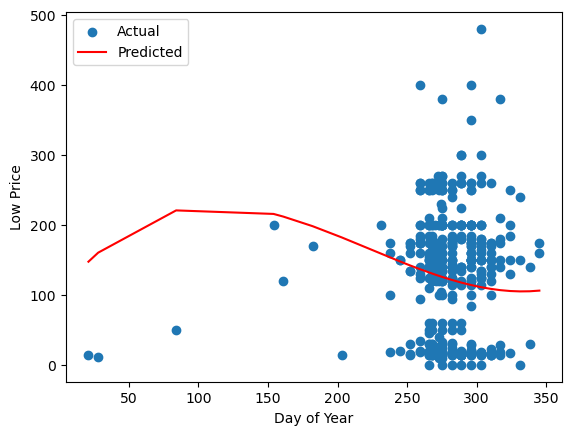

In [7]:
sort_idx = X_test[:,0].argsort()
X_test_sorted = X_test[sort_idx]
pred_sorted = pred[sort_idx]

plt.scatter(X_test[:,0], y_test[sort_idx], label='Actual')
plt.plot(X_test_sorted[:,0], pred_sorted, color='red', label='Predicted')
plt.xlabel('Day of Year')
plt.ylabel('Low Price')
plt.legend()
plt.show()
